In [1]:
#installing relevant libraries & packages for analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [3]:
#loading in & viewing the data
data=pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#understanding underlying data scructure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#taking a peek at summary statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#apparently, there is a house in this dataset with 33 bedrooms, must be an absolutely massive mansion
#minimum square footage is 919, whereas max is 13540
#oldest house in the dataset was built in 1900, newest house 2015
#apparently, there is a lot in this data set with nearly 900,000 sqaure ft, can't even imagine how large the property is

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

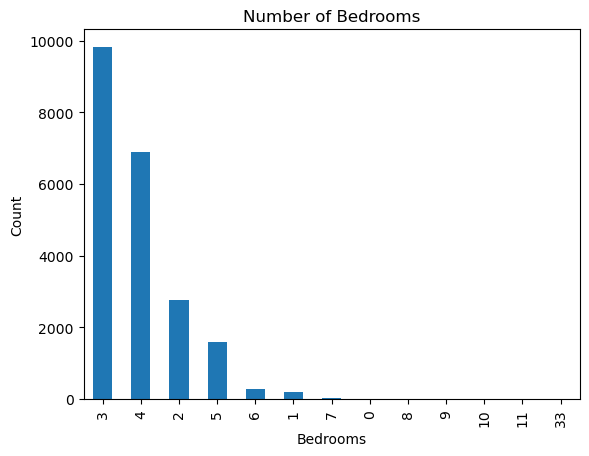

In [6]:
#transitioning to visual exploratory data analysis
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [ ]:
#most houses ten to have 3 or 4 bedrooms 
#we know there is at least one house with 33 bedrooms from earlier exploration
#there is at least one house with zero bedrooms in the dataset, perhaps an error or true to life, unsure
#some homes in the dataset contain 8-11 bedrooms repsectively 

<Figure size 800x800 with 0 Axes>

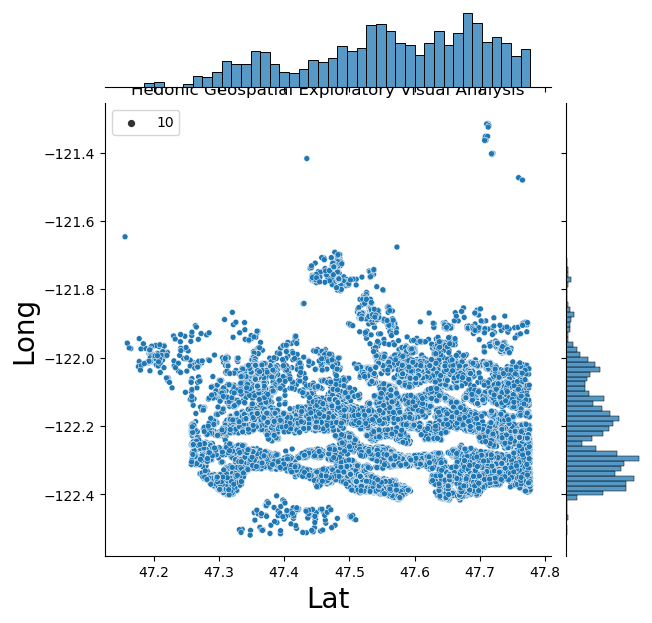

TypeError: 'module' object is not callable

In [22]:
#conducting geospatial exploratory data analysis
#zip codes, exact latittude, and exact longitude are represented in the dataset
plt.figure(figsize=(8,8))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.title('Hedonic Geospatial Exploratory Visual Analysis')
plt.ylabel('Long', fontsize=20)
plt.xlabel('Lat', fontsize=20)
plt.show()
plt1 = plt()
sns.despine

In [ ]:
#so, i am seeing some spikes & clustering around the 47.7 latitude mark
#also, seeing some spikes & clustering -122.3 longitude mark
#this lat/long combination should, in theory, represent "ideal location" for properties/houses

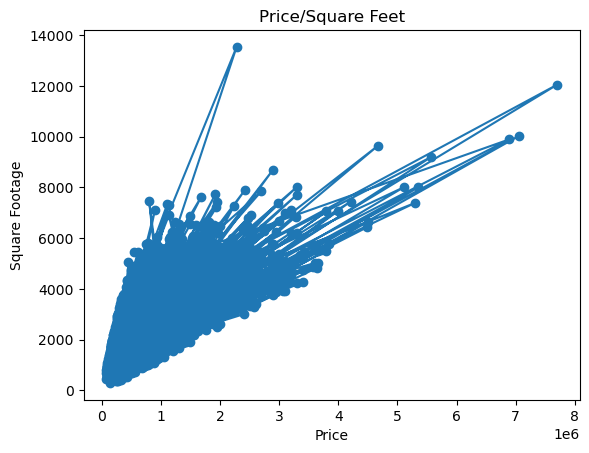

In [24]:
#continuing exploratory data analysis, getting a feel to what variables affect price variation for regression model
#intuitively, i suspect that house price and square footage are likely linearly correlated
#going to investigate that suspicion first 
plt.scatter(data.price,data.sqft_living)
plt.title("Price/Square Feet")
plt.xlabel("Price")
plt.ylabel('Square Footage')
plt.plot(data.price, data.sqft_living)

In [ ]:
#linear correlation suspicion appears to be correct

Text(0, 0.5, 'Longitude')

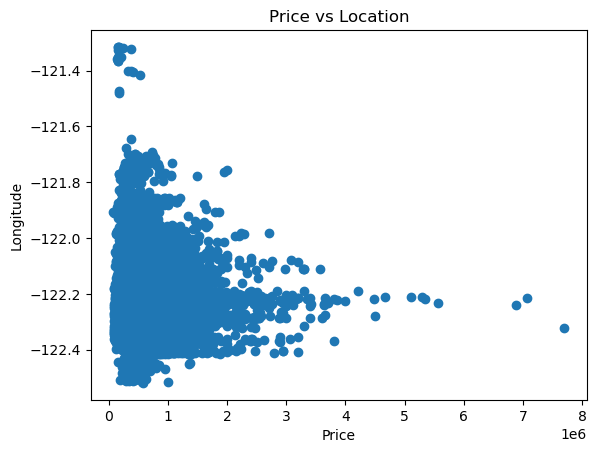

In [25]:
#i also intuitively know there is a geospaital component to house pricing
#already confirmed it in previous visual as well 
#going to take a look at regression plot next to see different perspective 
#longitudunal relationship
plt.scatter(data.price,data.long)
plt.title("Price vs Location")
plt.xlabel("Price")
plt.ylabel('Longitude')

<function matplotlib.pyplot.show(close=None, block=None)>

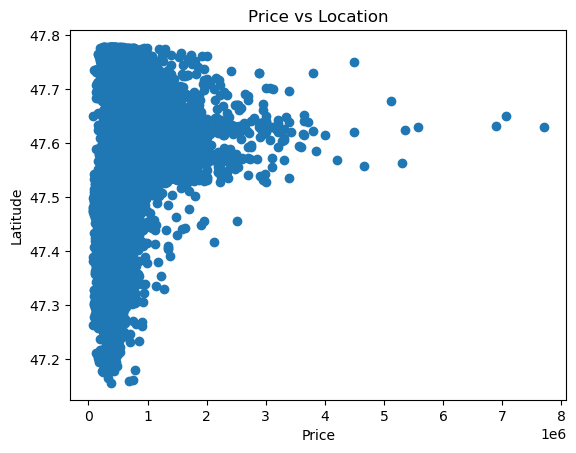

In [21]:
#latitudunal relationship
plt.scatter(data.price,data.lat)
plt.title("Price vs Location")
plt.xlabel('Price')
plt.ylabel('Latitude')
plt.show

In [ ]:
#once again, we are seeing the same general clustering, just broken up a bit more into two different plots instead of matrix

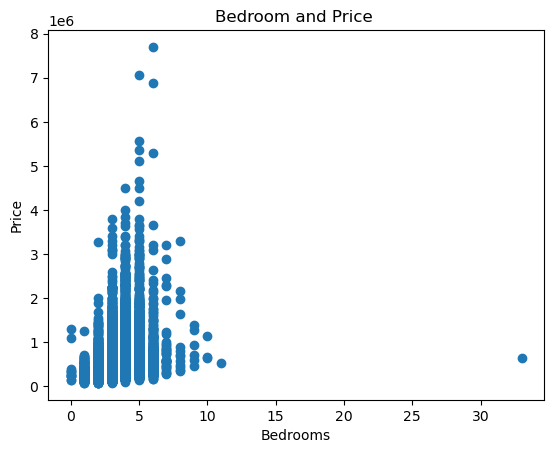

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [12]:
#taking a look at how the number of bedrooms affect price variation
plt.scatter(data.bedrooms,data.price)
plt.title("Price/Bedroom Relationship")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

In [ ]:
#as we found earlier, most houses in the dataset contain about 3-5 bedrooms
#the big outlier is the house with 33 bedrooms, found earlier through summary statistics table 

<function matplotlib.pyplot.show(close=None, block=None)>

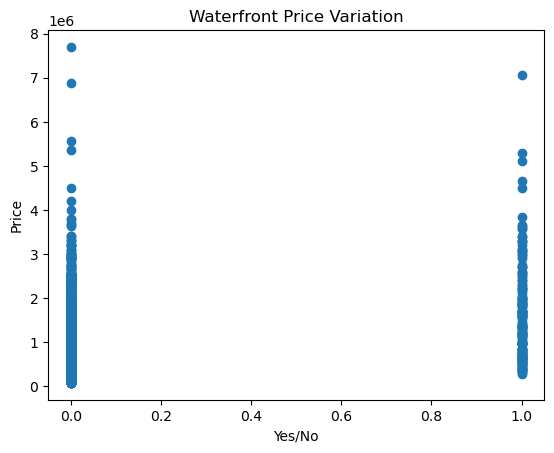

In [20]:
#digging a bit deeper into geospatial analysis, i know the dataset has a column for waterfront
#it is a binary discrete variable akin to a yes/no => 1 being has waterfront property, 0 otherwise
#want to explore price variation with respect to this variable, intuitively expect it will have a big impact 
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront Price Variation")
plt.xlabel('Yes/No')
plt.ylabel('Price')
plt.show

In [ ]:
#interesting, the most expensive home appears to not have waterfront property 

Text(0, 0.5, 'Count of Homes')

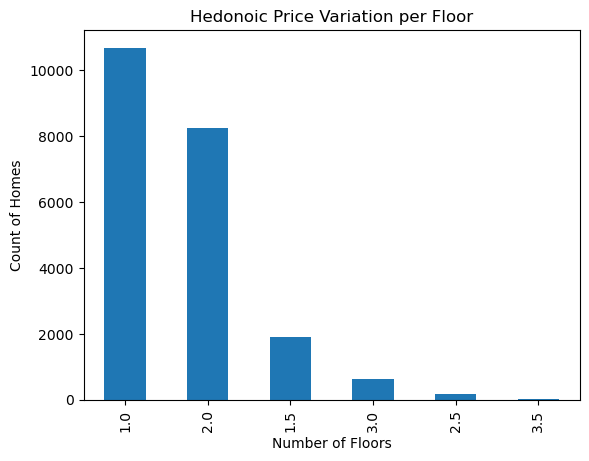

In [26]:
#getting a feel for number of floors per home distribution
data.floors.value_counts().plot(kind='bar')
plt.title('Hedonoic Price Variation per Floor')
plt.xlabel('Number of Floors')
plt.ylabel('Count of Homes')

In [ ]:
#vast majority of homes in the dataset are 1-2 floors 

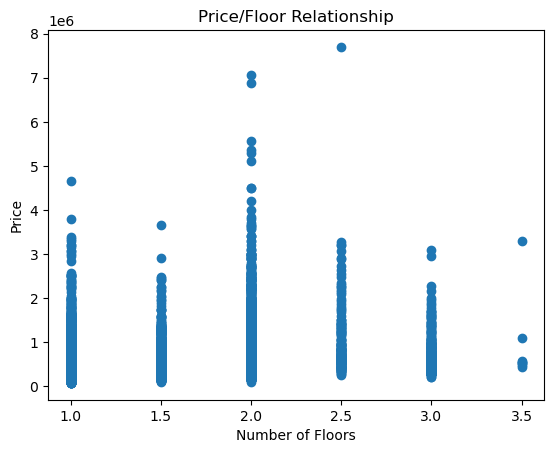

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [27]:
#seeing how number of floors affect price 
plt.scatter(data.floors,data.price)
plt.title("Price/Floor Relationship")
plt.xlabel("Number of Floors")
plt.ylabel("Price")
plt.show()
sns.despine

In [ ]:
#one home with 2.5 floors appears to be priced irregularly high 
#either someone got ripped off, the home is really nice, or the home is in a really nice location

Text(0, 0.5, 'Price')

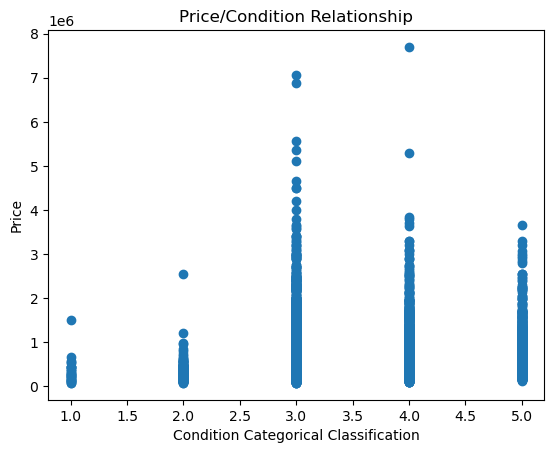

In [28]:
#taking a look at how home condition affects price variation 
plt.scatter(data.condition,data.price)
plt.title('Price/Condition Relationship')
plt.xlabel('Condition Categorical Classification')
plt.ylabel('Price')

In [ ]:
#homes in the 3/5 condition state appear to have greatest amount of variation
#outlier in home condition 4 category 
#as a whole, homes in the 1 condition category appear to be significantly cheaper, as expected

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

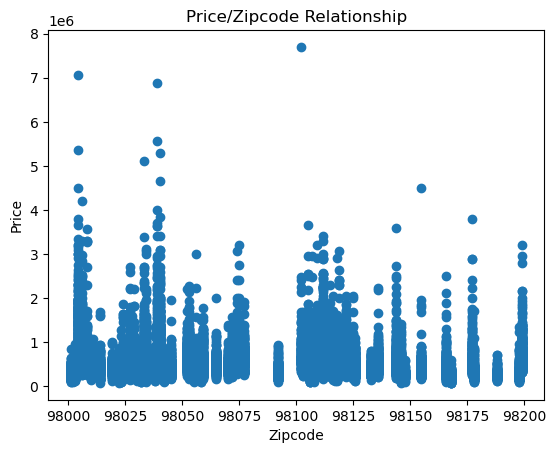

In [30]:
#revisting geospatial analysis factors
#determining price variation by zipcode 
plt.scatter(data.zipcode,data.price)
plt.title("Price/Zipcode Relationship")
plt.xlabel('Zipcode')
plt.ylabel('Price')
sns.despine

In [ ]:
#apparently, that really expensive home is in zip code 98100, by far most expensive home in that zip

In [37]:
#preparing for regression analysis 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression()

In [38]:
#creating labels & manipulating some data
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [39]:
#defining training and test data subsets
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [40]:
#fitting regression model & reporting R^2 value 
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.7320342760357326

In [ ]:
#my regression model explained about 75% of price variation 